# Charging up effect
Due to the high electric field over the GEM foil, the capton is expected to polarise. The polarised capton captures electrons of the avalanches, which leads to an increase of the electric field. This in turn leads to an increase in gain and thus in efficiency.

The goal of this analysis is to determine the charging up effect over one spill. A spill is a period of beam in the testbeam setup, over which charging up effects can occur. The charges are expected to dissapear again during the interspill period. To look at this effect, one wants to have a look at the efficiency of the detector over time during one spill, averaged over different spills to increase the statistics.

Calculate the event rate for different runs, especially long runs, and see if you can distribute them in different groups in this case.

In [2]:
%load_ext autoreload
%autoreload 2
from testbeam import *
from tabulate import tabulate

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/eos/home-s/sivander/SWAN_projects/tutorial/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/eos/home-s/sivander/SWAN_projects/tutorial/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


In [3]:
branches = read_runfile('217', downloaded=True, printbranches=True)
prop_x, prop_y, rec_x, rec_y, residuals_x, residuals_y, valid_props, valid_recs, chi2_mask = calc_residuals(branches)

['orbitNumber', 'bunchCounter', 'eventCounter', 'tracks_X_chi2', 'tracks_Y_chi2', 'tracks_X_slope', 'tracks_Y_slope', 'tracks_X_intercept', 'tracks_Y_intercept', 'tracks_X_covariance', 'tracks_Y_covariance', 'rechits2D_Chamber', 'rechits2D_X', 'rechits2D_Y', 'rechits2D_X_Error', 'rechits2D_Y_Error', 'rechits2D_X_ClusterSize', 'rechits2D_Y_ClusterSize', 'prophits2D_X', 'prophits2D_Y', 'prophits2D_X_Error', 'prophits2D_Y_Error', 'trackChi2X', 'trackChi2Y', 'trackCovarianceX', 'trackCovarianceY', 'allChi2', 'trackSlopeX', 'trackSlopeY', 'trackInterceptX', 'trackInterceptY', 'rechitChamber', 'prophitChamber', 'rechitEta', 'rechitClusterCenter', 'rechitDigiStrip', 'rechitRawChannel', 'rechitLocalX', 'rechitLocalY', 'rechitLocalR', 'rechitLocalPhi', 'rechitGlobalX', 'rechitGlobalY', 'rechitClusterSize', 'prophitEta', 'prophitGlobalX', 'prophitGlobalY', 'prophitErrorX', 'prophitErrorY', 'prophitLocalX', 'prophitLocalY', 'prophitLocalR', 'prophitLocalPhi']


### Reconstruct time during one spill

In [4]:
abstime = reconstruct_time(branches)
spilltime = time_from_spillstart(branches)

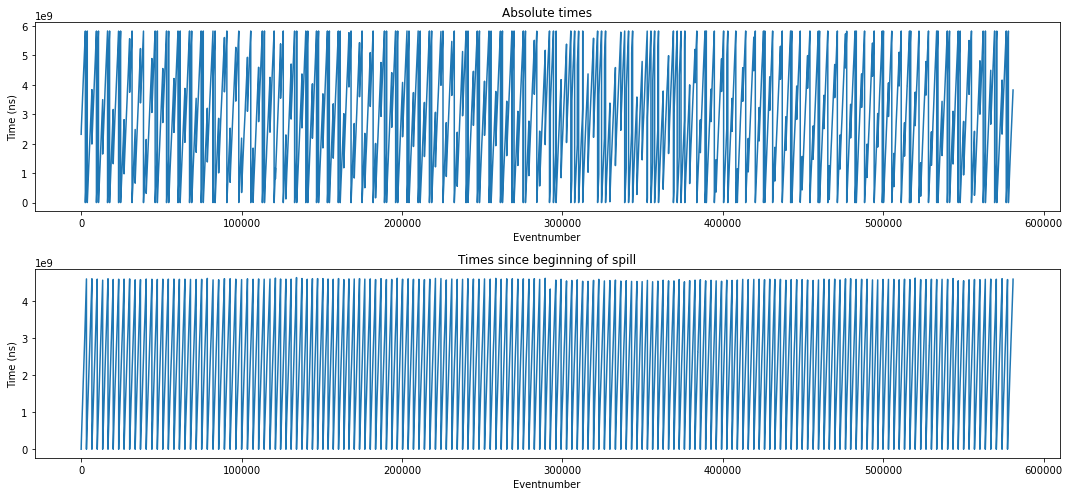

In [5]:
fig, ax = plt.subplots(2, 1, figsize=(15, 7))
ax[0].plot(branches['eventCounter'], abstime)
ax[1].plot(branches['eventCounter'], spilltime)
ax[0].set(xlabel='Eventnumber', ylabel='Time (ns)', title='Absolute times')
ax[1].set(xlabel='Eventnumber', ylabel='Time (ns)', title='Times since beginning of spill')
fig.tight_layout()
plt.savefig('eventnumber_time', dpi=300)
plt.show()

### Plot efficiency as function of time averaged over different spills

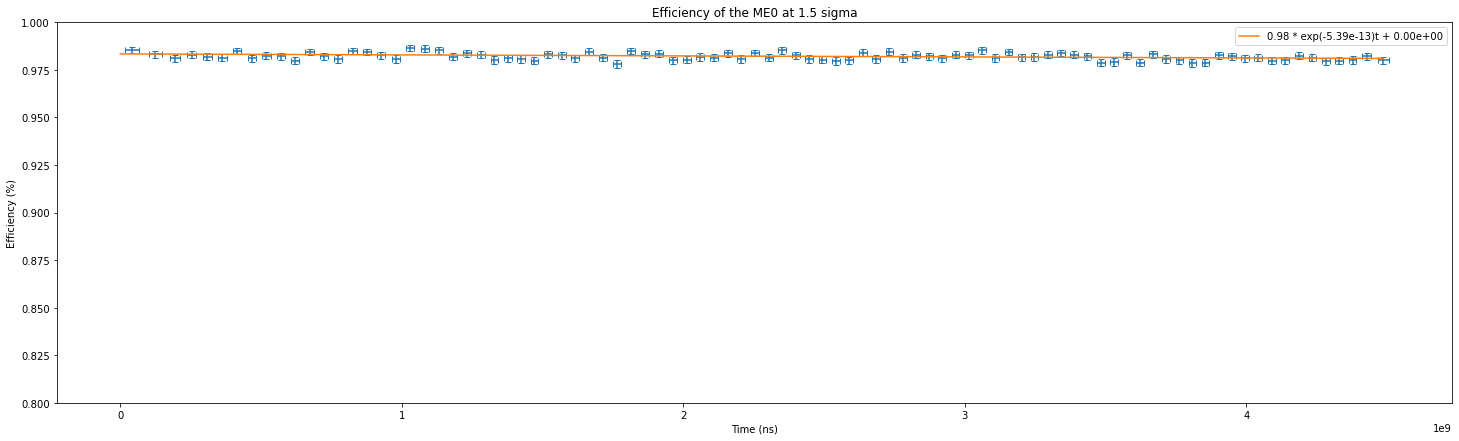

CPU times: user 1min 18s, sys: 343 ms, total: 1min 19s
Wall time: 1min 19s


In [26]:
%time plot_meaneff_spilltime(branches, sigmanum = 1.5, N = 5000, makefit=True)